In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install num2words
import num2words
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import math
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from numpy import array
from numpy import asarray
from numpy import zeros
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
from keras.layers.convolutional import Conv1D 
from keras.layers import GlobalMaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#step 1- Mount your Google Drive to Collaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ABSA_MS_Research_Project/roberta_labelling.csv')

In [ ]:
df.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
0,0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.314967,0.201532,0.273320,0.229622,0.141261,room,0.314967,POSITIVE,0.998728
1,1,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,arrived late evening took advice previous rev...,0.190782,0.280859,0.244333,0.333305,0.112914,service,0.333305,POSITIVE,0.982104
2,2,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,check quick easy,0.127808,0.147495,0.227857,0.233826,0.187619,service,0.233826,POSITIVE,0.998047
3,3,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,little disappointed non existent view room ro...,0.480039,0.230525,0.221496,0.174181,0.158015,room,0.480039,NEGATIVE,0.999477
4,4,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,bed comfortable woke stiff neck high pillows,0.184796,0.073833,0.020726,0.015454,0.106296,room,0.184796,NEGATIVE,0.998174


In [ ]:
len(df)

10003

Split into train and test



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


POSITIVE    6517
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

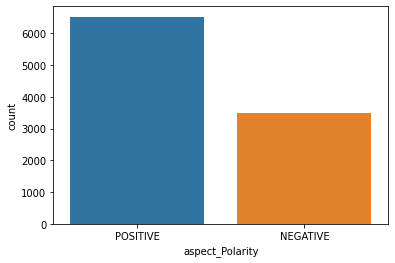

In [ ]:
sns.countplot(df.aspect_Polarity)
df.aspect_Polarity.value_counts()

In [ ]:
 from sklearn.utils import shuffle
 def cap_data(df):
    cap_df= pd.DataFrame()
    cap_df = df[df['aspect_Polarity']== 'POSITIVE'][:4000]
    cap_df = cap_df.append(df[df['aspect_Polarity']== 'NEGATIVE'])
    cap_df = shuffle(cap_df)   
    return(cap_df)

df = cap_data(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


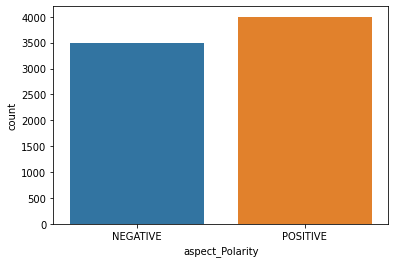

In [ ]:
import seaborn as sns
sns.countplot(df.aspect_Polarity)

In [ ]:
df.aspect_Polarity.value_counts()

POSITIVE    4000
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

In [ ]:
df.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
3867,3867,upgraded delighted husband stayed nights early...,5,upgraded delighted husband stayed nights early...,hotel older building,0.350320,0.141615,0.183045,0.112066,0.054180,room,0.350320,NEGATIVE,0.978931
4954,4954,sunshine just returned week trip dominican rep...,3,sunshine returned week trip dominican rep. say...,rooms drywall buildings concrete blocks,0.350292,0.123315,0.118205,0.023052,0.047833,room,0.350292,NEGATIVE,0.997400
2353,2353,"careful book, careful room type person, husban...",3,"careful book, careful room type person, husban...",husband room double beds no kings available b...,0.339415,0.131315,0.095892,0.056398,0.096347,room,0.339415,NEGATIVE,0.991417
6403,6403,great families family 4 stayed earlier week tr...,4,great families family four stayed earlier week...,rooms n't luxurious nice quite clean trip lux...,0.340841,0.148036,0.263927,0.125133,0.071264,room,0.340841,NEGATIVE,0.999448
3985,3985,"dont bother, contrary belief n't pay, booked 2...",2,"dont bother, contrary belief n't pay, booked t...",staff snotty checked three:zero p.m. rooms as...,0.361852,0.258211,0.115331,0.186891,0.068980,room,0.361852,NEGATIVE,0.999475


In [ ]:
# labelling pos as 1 and neg as 0
def making_label(st):
    if(st=='POSITIVE'):
      return 1
    else:
        return 0
    
df['label'] = df['aspect_Polarity'].apply(making_label)
print(df.shape)

(7486, 15)


In [ ]:
# conversion of input data
df = pd.DataFrame({
    'text': df['sentence_reviews'].replace(r'\n', ' ', regex=True),
    'label': df['label']
})


In [ ]:
df.head()

,text,label
3867,hotel older building,0
4954,rooms drywall buildings concrete blocks,0
2353,husband room double beds no kings available b...,0
6403,rooms n't luxurious nice quite clean trip lux...,0
3985,staff snotty checked three:zero p.m. rooms as...,0


In [ ]:
print(df.shape)
X = df['text']
y = df['label']

(7486, 2)


**Train_Test_Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5988,)
(1498,)
(5988,)
(1498,)


In [ ]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

**Preparing the Embedding Layer**

In [ ]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
vocab_size

6949

**ANN**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=maxlen),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          694900    
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 695,921
Trainable params: 695,921
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, epochs=10, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)
pred = model.predict(X_test)

Epoch 1/10
19/19 [==============================] - 1s 17ms/step - loss: 0.6887 - accuracy: 0.5374 - val_loss: 0.6838 - val_accuracy: 0.5384
Epoch 2/10
19/19 [==============================] - 0s 9ms/step - loss: 0.6732 - accuracy: 0.5979 - val_loss: 0.6701 - val_accuracy: 0.6018
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 0.6492 - accuracy: 0.6887 - val_loss: 0.6488 - val_accuracy: 0.7129
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 0.6140 - accuracy: 0.7522 - val_loss: 0.6163 - val_accuracy: 0.7621
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 0.5598 - accuracy: 0.7898 - val_loss: 0.5708 - val_accuracy: 0.7796
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 0.4983 - accuracy: 0.8234 - val_loss: 0.5285 - val_accuracy: 0.7938
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 0.4390 - accuracy: 0.8514 - val_loss: 0.4953 - val_accuracy: 0.7972
Epoch 8/10
19/19 [=

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4764256477355957
Test Accuracy: 0.7683578133583069


In [ ]:

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(['train','test'], loc = 'upper left')
  plt.show()

In [ ]:
def evaluate(model,X_test,y_test):
    y_hat = model.predict(X_test)
    print(y_hat)
    y_hat = (y_hat >= 0.5).astype(np.float32)
    print('rectified y_hat')
    print(y_hat)
    print(y_hat.shape)
    report = classification_report(y_test, y_hat)
    return report

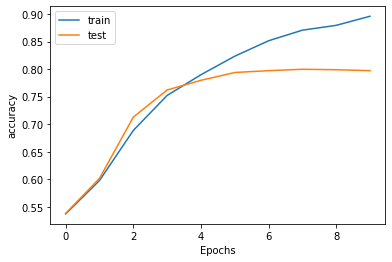

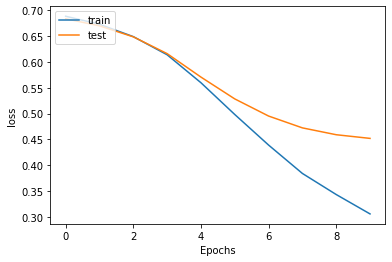

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")



In [ ]:
report = evaluate(model,X_test,y_test)
print(report)

[[0.28060266]
 [0.47031468]
 [0.9275723 ]
 ...
 [0.30037302]
 [0.18029149]
 [0.09444674]]
rectified y_hat
[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
(1498, 1)
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       726
           1       0.77      0.78      0.78       772

    accuracy                           0.77      1498
   macro avg       0.77      0.77      0.77      1498
weighted avg       0.77      0.77      0.77      1498



Hyperparameters Optimization

In [ ]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, 100, input_length=maxlen),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
 # Parameter grid for grid search
param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[100],
                      maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model,
                            epochs=10, batch_size=10,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

    # Evaluate testing set
test_accuracy = grid.score(X_test, y_test)
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", grid_result.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_result.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_result.best_params_)
test_accuracy

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          694900    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 695,921
Trainable params: 695,921
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          694900    
                                                                 
 global_max_pooling1d_2 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 695,921
Trainable params: 695,921
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)             

0.7636849284172058

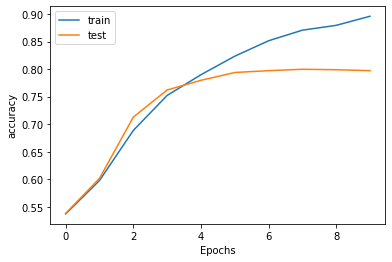

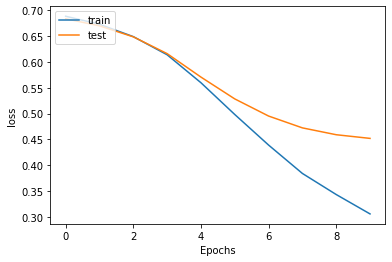

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
def evaluate_cv(model,X_test,y_test):
    y_hat = model.predict(X_test)
    print(y_hat)
    print(y_hat.shape)
    report = classification_report(y_test, y_hat)
    return report

In [ ]:
report = evaluate_cv(grid_result,X_test,y_test)
print(report)

[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
(1498, 1)
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       726
           1       0.76      0.80      0.78       772

    accuracy                           0.76      1498
   macro avg       0.76      0.76      0.76      1498
weighted avg       0.76      0.76      0.76      1498

